<a href="https://colab.research.google.com/github/geo-tp/053-Database-Frontend/blob/master/kmeans_clustering_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [6]:
# Generate synthetic data that is more easily clusterable
X, _ = make_blobs(n_samples=800, centers=4, cluster_std=1.5, n_features=2, random_state=42)


# Create a DataFrame from the synthetic data
clients = pd.DataFrame(X, columns=['Frequency', 'Amount'])


# Visualisation du DataFrame pour s'assurer que les données sont générées correctement
clients.head()

,Frequency,Amount
0,-9.420593,7.579147
1,-6.054549,-8.332626
2,3.454167,2.680372
3,3.583363,-0.139522
4,5.479565,3.594341


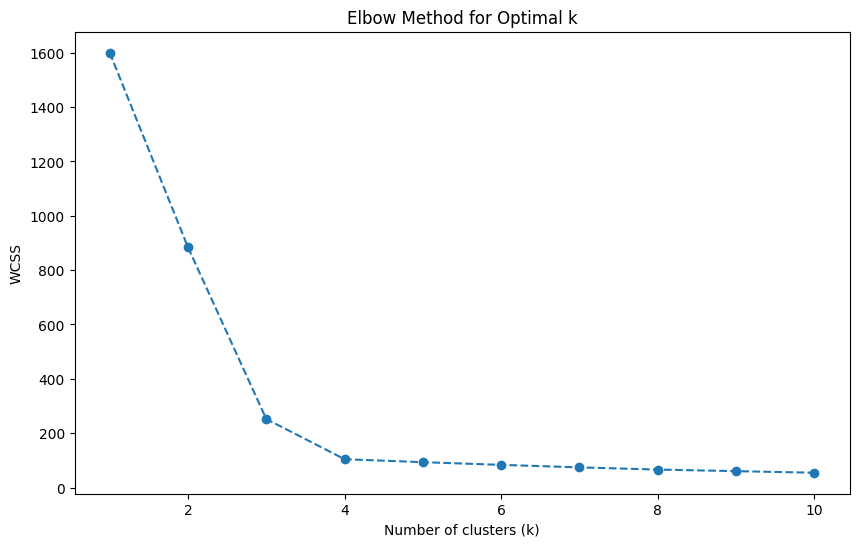

In [7]:
# Avant d'appliquer le clustering, il est commun de normaliser les données pour assurer que toutes les variables contribuent équitablement au résultat.
# Normalisation des données avec StandardScaler
scaler = StandardScaler()
scaled_clients = scaler.fit_transform(clients)  # Nous ne normalisons pas la catégorie car c'est une variable catégorielle

# Determiner le nombre de cluster optimal
wcss = []  # Within-cluster sum of square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=42)
    kmeans.fit(scaled_clients)
    wcss.append(kmeans.inertia_)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Reapplying K-means clustering to the scaled data
kmeans = KMeans(n_clusters=4, n_init=42)
kmeans.fit(scaled_clients)

# Assigning the cluster labels to the original clients DataFrame
clients['Cluster'] = kmeans.labels_

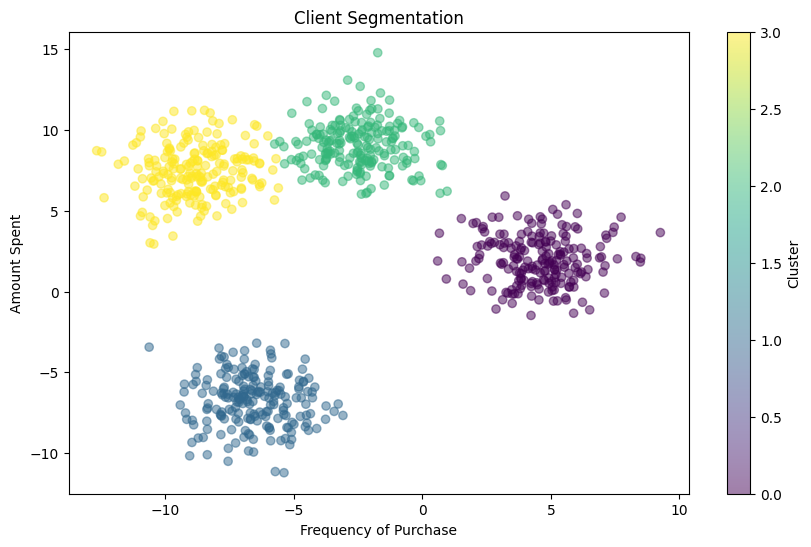

In [9]:
# Visualization
plt.figure(figsize=(10, 6))

# We will only plot the first two dimensions (Frequency and Amount) for simplicity
plt.scatter(clients['Frequency'], clients['Amount'], c=clients['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Client Segmentation')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Amount Spent')
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

# Analyse de la Segmentation des Clients

- **Cluster Bleu** : Clients avec une fréquence d'achat et des dépenses faibles. Ils représentent des clients occasionnels qui font des achats sporadiques et dépensent peu à chaque fois. Stratégies potentielles : introduire des offres de bienvenue ou des remises pour stimuler l'engagement.

- **Cluster Jaune** : Ce segment de clients a une fréquence d'achat et des dépenses moyennes à élevées. Ces clients pourraient être fidèles et réalisent des achats réguliers de valeur raisonnable. Stratégies potentielles : programmes de récompenses ou promotions ciblées pour maintenir et augmenter leur fidélité.

- **Cluster Vert** : Clients avec une fréquence et des dépenses élevées. Ce sont probablement des clients VIP qui génèrent une grande partie du chiffre d'affaires. Stratégies potentielles : offres exclusives, programmes de fidélité haut de gamme ou services personnalisés pour renforcer leur fidélité et leur satisfaction.

- **Cluster Violet** : Groupe caractérisé par une fréquence d'achat régulière mais des dépenses relativement basses. Ces clients peuvent souvent acheter des produits nécessaires ou de faible valeur. Stratégies potentielles : des bundles ou des offres de cross-selling pour augmenter la valeur moyenne des transactions.

## Points Clés :

- **Séparation des Clusters** : La distinction nette entre les clusters indique que le modèle de segmentation est efficace pour identifier des groupes de clients distincts.

- **Stratégies de Marketing** : Chaque cluster peut être approché avec une stratégie de marketing distincte qui correspond à leurs habitudes d'achat et à leur potentiel de dépense.

- **Densité des Clusters** : Les clusters plus denses suggèrent un comportement d'achat plus uniforme au sein de ces groupes, tandis que les clusters moins denses peuvent indiquer des opportunités pour une personnalisation accrue et une compréhension plus nuancée des besoins des clients.

- **Analyse Supplémentaire** : Intégrer des données démographiques ou comportementales supplémentaires pourrait fournir une compréhension encore plus profonde des motivations et des besoins de chaque segment de clientèle.

En résumé, ces résultats offrent une base solide pour des décisions de marketing stratégique et pour une allocation plus efficace des ressources commerciales.
